# <font color=cyan>X-Sell Personal Loans to Liability product customers</font>

>Personal Loan cross sell campaigns have received a healthy response at Thera Bank. The management now wants to improve the RoI of such campaigns. The marketing team needs to target liability customers who are pre-disposed to buying a personal loan. Our objective here will be to develop a classification model that will use response data from a previous campaign to establish the propensity of conversion for any liability customer

#### <font color=red> Data:</font> 
Personal Loan Cross sell campaign response data for liability customers


#### <font color=red> Attributes:</font>
- Customer ID
- Age (in years)
- Professional Experience (in years)
- Income of the Customer (in thousands of USD)
- Zip Code of residence
- Size of Family
- Average monthly credit card spend ( in thousands of USD)
- Education (Unger Grad, Post Grad, Advanced/Professional)
- Value of home mortgage (in thousands of USD)
- Response to campaign (Whether customer bought a personal loan or no)
- Securities account indicator
- CD account indicator
- Internet banking indicator
- Universal Bank credit card indicator

Given our objective, we can define the Response to campaign (Whether customer bought a personal loan or no) as our dependent variable. This attribute is present in the data by the name of 'Personal Loan'

In [5]:
# Since we will be generating a lot of charts, let's ensure that all matplotlib charts are rendered within the ipython shell

%matplotlib inline 

# Let's avoid printing of warnings
import warnings
warnings.filterwarnings('ignore')

# importing other libraries

import os
import pandas as pd
from pydantic_settings import BaseSettings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
from statsmodels.stats.proportion import proportions_ztest


ModuleNotFoundError: No module named 'pydantic_settings'

# <font color=cyan>Loading and checking data</font>

In [5]:
#Let's begin by importing data
campaign_data=pd.read_csv('./Data/Bank_Personal_Loan_Modelling.csv')

In [6]:
#See top rows
campaign_data.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
#Check Data Types of Columns
campaign_data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [8]:
#Check number of rows and columns
campaign_data.shape

(5000, 14)

In [9]:
#Data info
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
# Column names of Data frame
campaign_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [11]:
# Check duplicates in a data frame
campaign_data.duplicated().sum()

0

In [12]:
# Check the presence of missing values
campaign_data.isnull().sum()+campaign_data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [13]:
#Five number summary
campaign_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


***

Certain observations can be made by just looking at the above statistics

***
> - We notice that __none__ of the fields have a missing value
>> - This is important because othewise we would've had to perform exclusions or missing value imputations - but, none of that here

> - The data is for individuals who are __more than 23 years of age__, and includes individuals till the __age of 67__. That's quite a __wide range__
>> - The __mean and the median are fairly close__ to each other which implies a __symmetric distribution__ with __negligible skew__
>> - The 5 number summary suggests __no outliers__

> - Similarly, __Experiece__ ranges from __-3__ to __43__. Here __-3__ is an obvious __abberation__. We will choose to floor the minimum experience value to __zero__ before further analysis
>> - The __mean and the median are fairly close__ to each other which implies a __symmetric distribution__ with __negligible skew__
>> - The 5 number summary suggests __no outliers__ other than the erronous __negative values__


> - The __Income__ has a wide range from __8000__ to __224000__ US Dollars
>> - The income distribution appears to be right skewed with a long tail. 

> - __Average monthly credit card spend__, ranges __0__ to __10000__ US Dollars
>> - The distribution appears to be right skewed with a long tail. 

>> - More than __half__ of the respondents do not have a __mortgage__ and hence the distribution has a right skew.

>> - Zip Code, Family, Education, Personal Loan, Securities Account, CD Account, Online and Credit Card are all categorical variables, with several being binary

>> - Average __Family Size__ is __2.4__ with the median size of __2__
>> - __9.6%__ of the respondents took a __Personal Loan__. This is our __dependent variable__. The response rate indicates __biased distribution__
>>- 10% have Securities Account, 6% have a CD Account and 29% have a Credit Card. Almost 60% respondents use internet banking

***

__It makes sense here to substantiate the above observations through charts and more statistics__


# <font color=cyan>Exploratory Data Analysis</font>

In [ ]:
#Leveraging pandas profiling to investigate data
profile = ProfileReport(campaign_data, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()

We'll choose to explore categorical and continuous variables independently and ignore the ID variable

In [14]:
cont=['Age','Experience','Income','CCAvg','Mortgage']
cat=['Personal Loan','Securities Account','CD Account','CreditCard','Online','Family','Education','ZIP Code']

In [15]:
# We can also look at the distributions of continuous variables and check for skew
def skew_cat(skew_val):
    if skew_val>0.5:
        return 'skewed towards the tail'
    elif skew_val<-.5:
        return 'skewed towards the head'
    else:
        return 'fairly symmetric'

def skew_chart(x,var):
    print("Distribution of " + str(var))
    sns.distplot(x)
    plt.show()
    print("The skew of "+str(var)+" is "+str(x.skew()) + " which indicates that it is " + skew_cat(x.skew()))

Distribution of Age


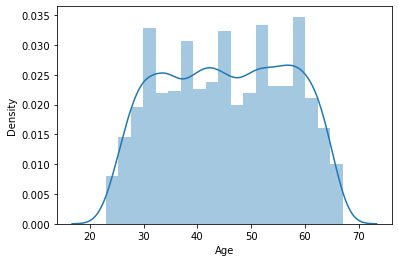

The skew of Age is -0.02934068151284029 which indicates that it is fairly symmetric
Distribution of Experience


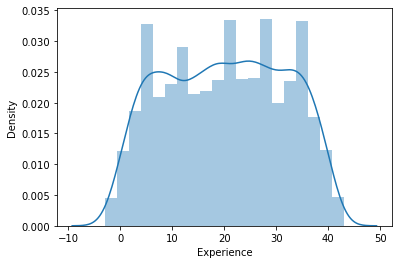

The skew of Experience is -0.026324688402384513 which indicates that it is fairly symmetric
Distribution of Income


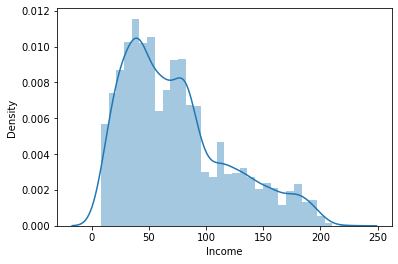

The skew of Income is 0.8413386072610816 which indicates that it is skewed towards the tail
Distribution of CCAvg


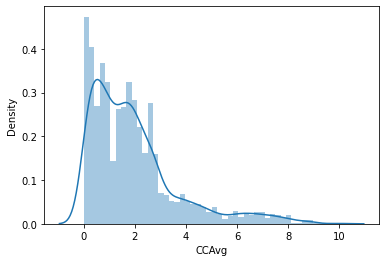

The skew of CCAvg is 1.5984433366678663 which indicates that it is skewed towards the tail
Distribution of Mortgage


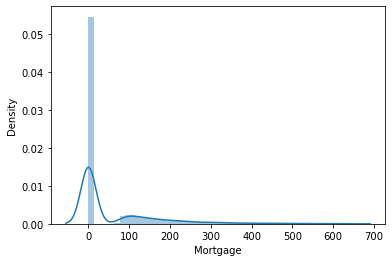

The skew of Mortgage is 2.1040023191079444 which indicates that it is skewed towards the tail


In [14]:
for i in cont:
    skew_chart(campaign_data[i],i)

The distribution confirms the skew in Income and Average Credit Card Spends

A large majority of accounts do not have Mortgage

Let's also check for Outliers

In [19]:
def outlier(dat,x,val):
      print("Box Plot for " + str(val))
      sns.set_style("dark")
      sns.boxplot(x)
      plt.show()
      print("As per the 'Median +/- 1.5 times IQR")
      med=x.median()
      upq=np.percentile(x,75)
      lwq=np.percentile(x,25)
      iqr=upq-lwq
      print (med,upq,lwq,iqr)

      print("For "+str(val)+" there are " + str(len(dat[x<(med-1.5*(iqr))])) + " outliers on the lower side")
      print("For "+str(val)+" there are " + str(len(dat[x>(med+1.5*(iqr))])) + " outliers on the upper side")
      print('----------')

Box Plot for Age


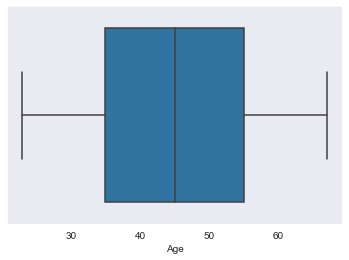

As per the 'Median +/- 1.5 times IQR
45.0 55.0 35.0 20.0
For Age there are 0 outliers on the lower side
For Age there are 0 outliers on the upper side
----------
Box Plot for Experience


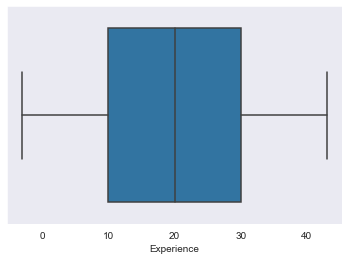

As per the 'Median +/- 1.5 times IQR
20.0 30.0 10.0 20.0
For Experience there are 0 outliers on the lower side
For Experience there are 0 outliers on the upper side
----------
Box Plot for Income


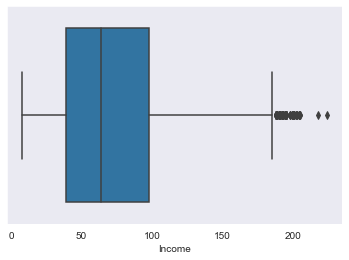

As per the 'Median +/- 1.5 times IQR
64.0 98.0 39.0 59.0
For Income there are 0 outliers on the lower side
For Income there are 423 outliers on the upper side
----------
Box Plot for CCAvg


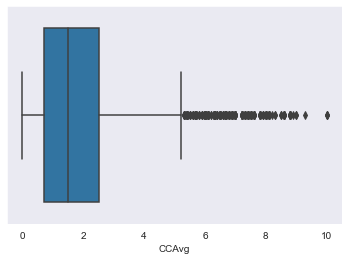

As per the 'Median +/- 1.5 times IQR
1.5 2.5 0.7 1.8
For CCAvg there are 0 outliers on the lower side
For CCAvg there are 517 outliers on the upper side
----------
Box Plot for Mortgage


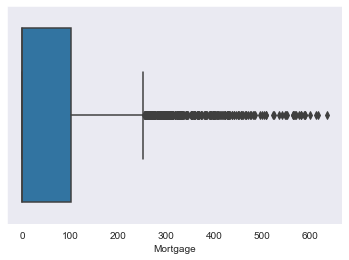

As per the 'Median +/- 1.5 times IQR
0.0 101.0 0.0 101.0
For Mortgage there are 0 outliers on the lower side
For Mortgage there are 776 outliers on the upper side
----------


In [16]:
for i in cont:
    outlier(campaign_data,campaign_data[i],i)

Income, Credit Card Spend and Mortgage, as expected has large outliers

Now, let's look at some countplots for categorical variables

Count Plot for Personal Loan


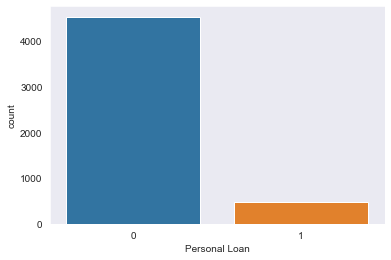

Count Plot for Securities Account


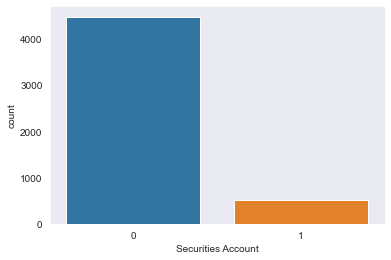

Count Plot for CD Account


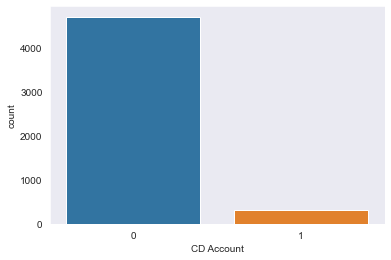

Count Plot for CreditCard


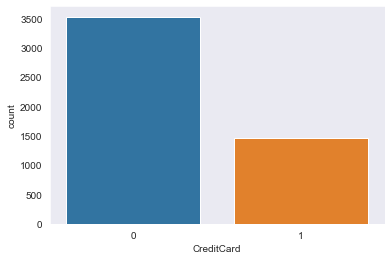

Count Plot for Online


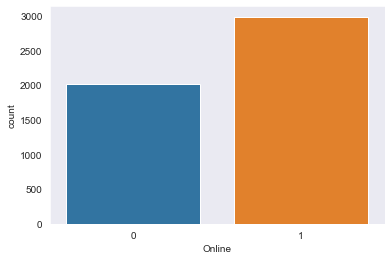

Count Plot for Family


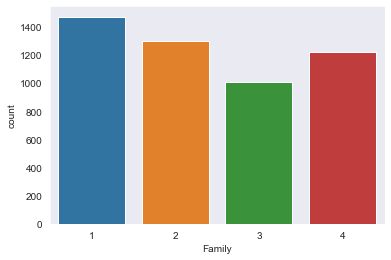

Count Plot for Education


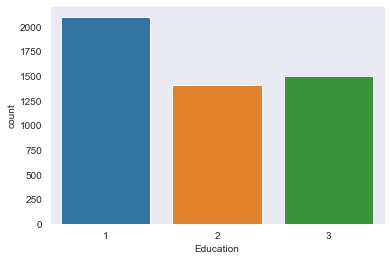

Count Plot for ZIP Code


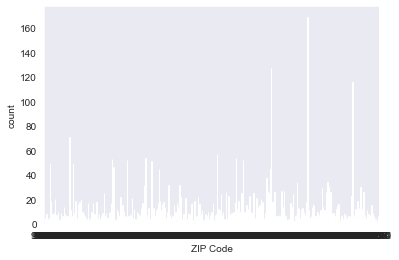

In [17]:
for i in cat:
    print("Count Plot for "+ i)
    sns.countplot(campaign_data[i])
    plt.show()

In [18]:
cat2=[item for item in cat if 'ZIP' not in item]
[campaign_data[item].value_counts(normalize=True,sort=True)*100 for item in cat2]



[0    90.4
 1     9.6
 Name: Personal Loan, dtype: float64,
 0    89.56
 1    10.44
 Name: Securities Account, dtype: float64,
 0    93.96
 1     6.04
 Name: CD Account, dtype: float64,
 0    70.6
 1    29.4
 Name: CreditCard, dtype: float64,
 1    59.68
 0    40.32
 Name: Online, dtype: float64,
 1    29.44
 2    25.92
 4    24.44
 3    20.20
 Name: Family, dtype: float64,
 1    41.92
 3    30.02
 2    28.06
 Name: Education, dtype: float64]

> 9.6% of the respondents accepted a Personal Loan Offer

> 10.44% of respondents had a Securities Account

> Only 6% of the respondents had a CD Account

> 29.4% of the respondents owned a credit card

> Almost 60% of the respondents used internet banking

> The median family size is 2 with family size of 1 being the highest with a proportion of 29.44%

> The largest proportion of respondents (41.92%) had an undergrad degree

#### Pairplot

Bivariate relationships of all numeric fields 



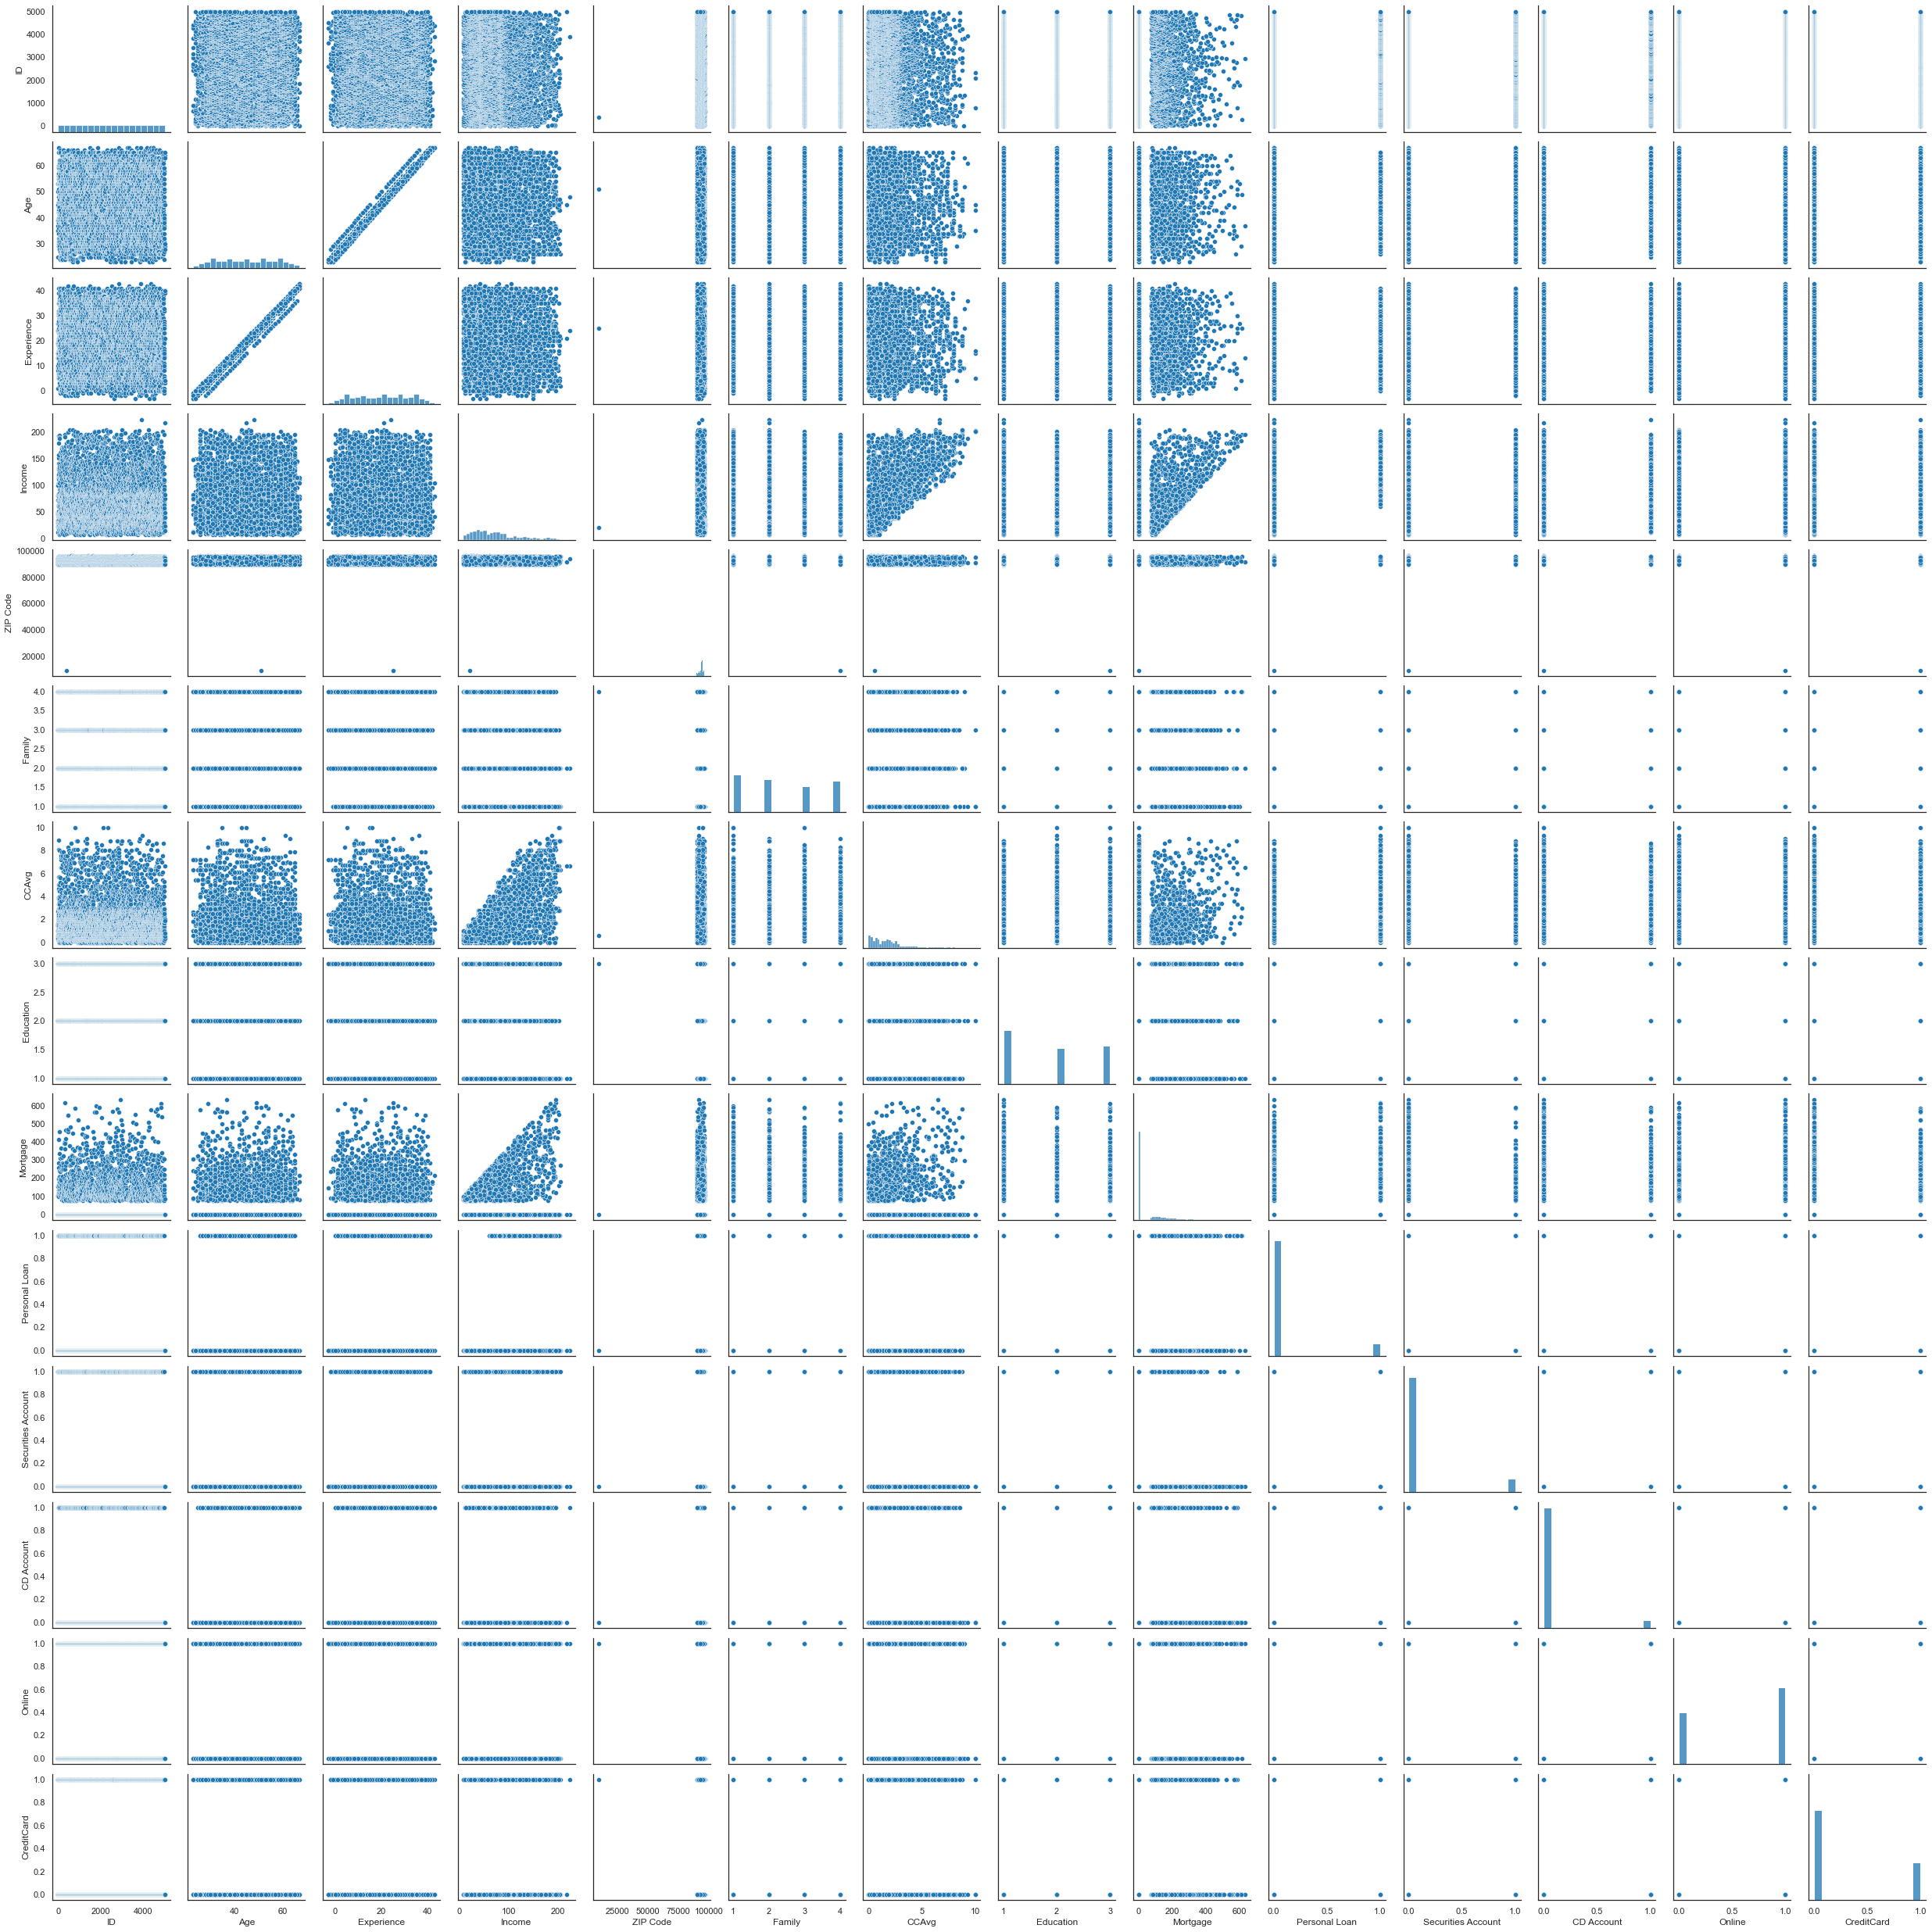

In [46]:
print("Bivariate relationships of all numeric fields \n")
sns.set_context("notebook")
sns.set_style("white")
sns.pairplot(campaign_data)
plt.show()

A lot of the findings from the profiling report are confirmed here

__There seems to be a clear relationship between Age and Experience__

__Average Credit Card Spend and Home Mortgage Value have  a relationship with Income__

__Income also seems to have a relationship with our dependent variable Personal Loan__


Relationship of Age with the response to Personal Loan offer




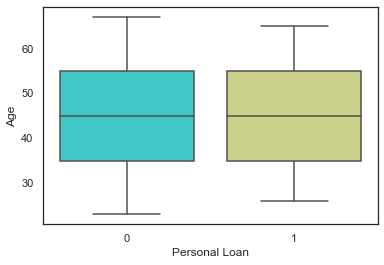

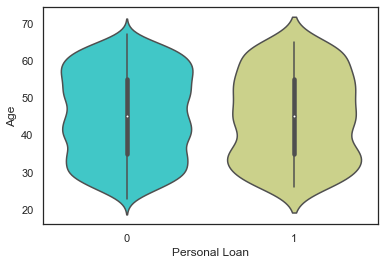

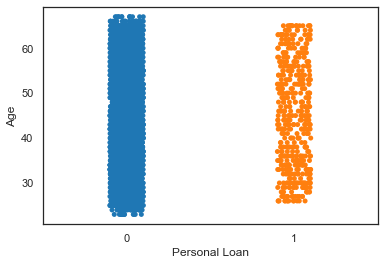

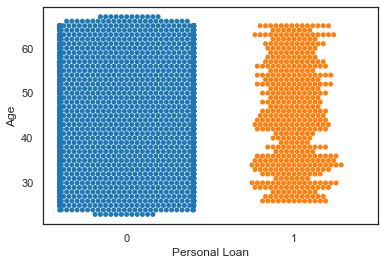



Relationship of Experience with the response to Personal Loan offer




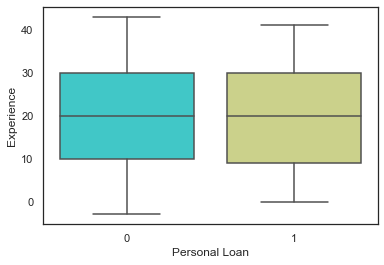

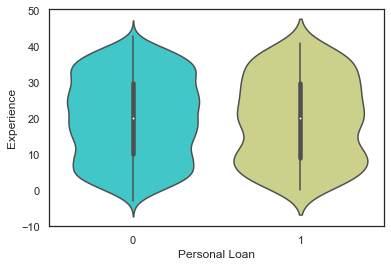

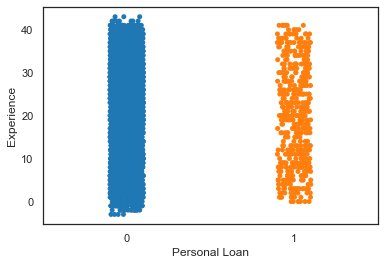

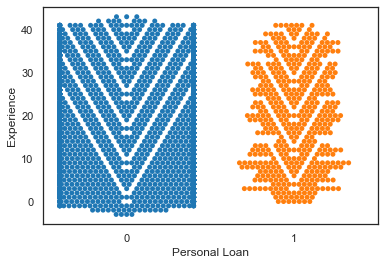



Relationship of Income with the response to Personal Loan offer




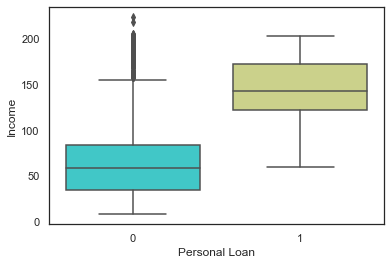

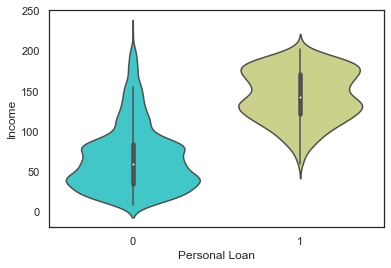

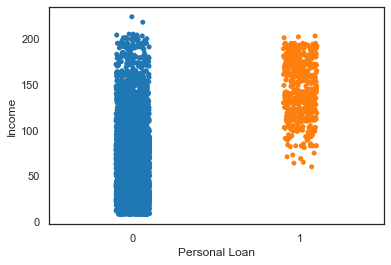

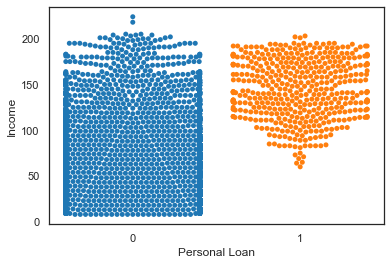



Relationship of CCAvg with the response to Personal Loan offer




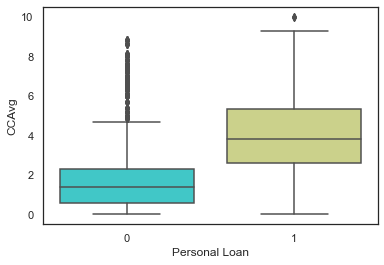

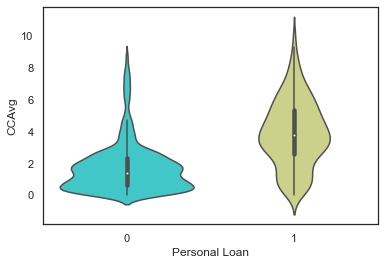

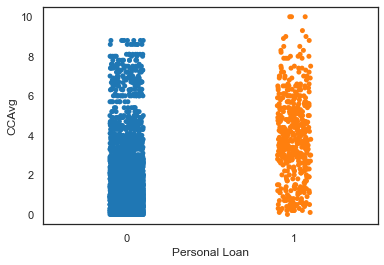

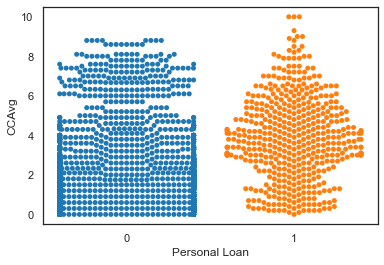



Relationship of Mortgage with the response to Personal Loan offer




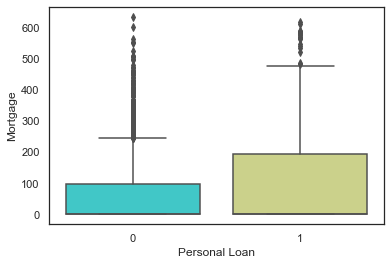

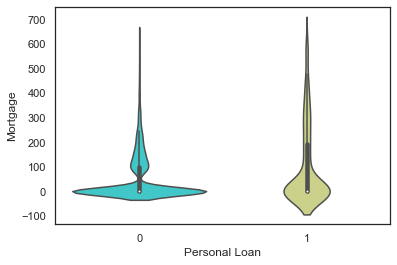

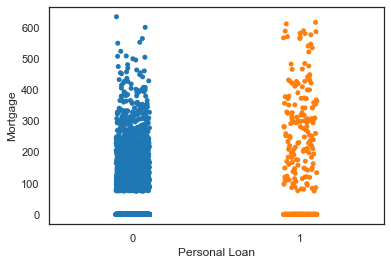

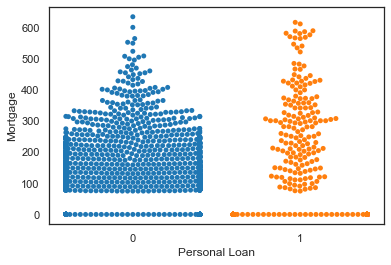

In [51]:
for i in cont:
    print("Relationship of " + i + " with the response to Personal Loan offer")
    print("\n")
    sns.boxplot(x='Personal Loan',y=i,data=campaign_data,palette='rainbow')
    plt.show()
    sns.violinplot(x="Personal Loan", y=i, data=campaign_data,palette='rainbow')
    plt.show()
    sns.stripplot(x="Personal Loan", y=i, data=campaign_data)
    plt.show()
    sns.swarmplot(x="Personal Loan", y=i, data=campaign_data)
    plt.show()
    print("\n")

Income and Credit Card Spend seem to have a strong relationship with the propensity of opting for a personal loan 

Now, let's look at the categorical variables

In [19]:
#define a function for categorical plot and a cross tabulation
def cat(x,y,dataset):
    print("Exploring relationship between "+ y+ " and "+ x)
    sns.catplot(y=y, hue=x, kind="count", palette="pastel", edgecolor=".6",data=dataset);
    plt.show()
    print("Cross tab")
    crosstab=pd.crosstab(dataset[x],dataset[y])
    print(crosstab)
    print("Cross Tab in percent(%)")
    print(crosstab.apply(lambda r:r/r.sum()*100,axis=1))
    grp=0
    print('Tests of proportions')
    for i in pd.unique(dataset[y]):
        success=np.array([dataset[dataset[x]==1].shape[0],crosstab[i][1]])
        samples=np.array([dataset.shape[0],crosstab[i].sum()])
        zstat,pvalue=proportions_ztest(count=success,nobs=samples,alternative='two-sided')
        print("For "+str(y)+"="+str(i)+" the p-value of the proportion test with overall population is " + str(pvalue))
        if pvalue<=.05:
            grp+=1

    if grp==0:
        print("There is no significant relationship between "+ y +" and " + x)
    else:
        print("There exists a significant relationship between "+ y +" and " + x)
    
    print("\n")



    

Exploring relationship between Securities Account and Personal Loan


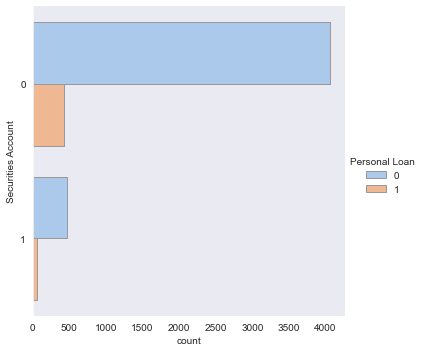

Cross tab
Securities Account     0    1
Personal Loan                
0                   4058  462
1                    420   60
Cross Tab in percent(%)
Securities Account          0          1
Personal Loan                           
0                   89.778761  10.221239
1                   87.500000  12.500000
Tests of proportions
For Securities Account=1 the p-value of the proportion test with overall population is 0.16560617103998765
For Securities Account=0 the p-value of the proportion test with overall population is 0.714293122631056
There is no significant relationship between Securities Account and Personal Loan


Exploring relationship between CD Account and Personal Loan


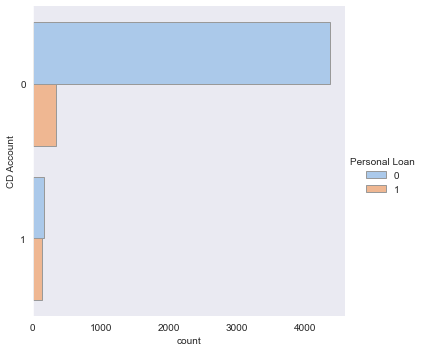

Cross tab
CD Account        0    1
Personal Loan           
0              4358  162
1               340  140
Cross Tab in percent(%)
CD Account             0          1
Personal Loan                      
0              96.415929   3.584071
1              70.833333  29.166667
Tests of proportions
For CD Account=0 the p-value of the proportion test with overall population is 2.91717853393623e-05
For CD Account=1 the p-value of the proportion test with overall population is 4.984473719986471e-83
There exists a significant relationship between CD Account and Personal Loan


Exploring relationship between CreditCard and Personal Loan


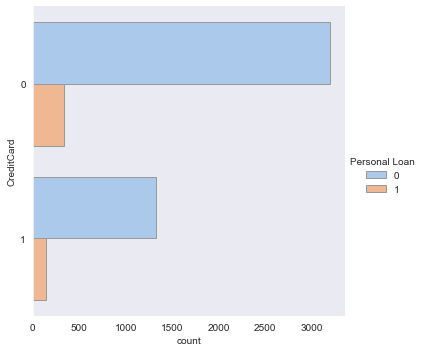

Cross tab
CreditCard        0     1
Personal Loan            
0              3193  1327
1               337   143
Cross Tab in percent(%)
CreditCard             0          1
Personal Loan                      
0              70.641593  29.358407
1              70.208333  29.791667
Tests of proportions
For CreditCard=0 the p-value of the proportion test with overall population is 0.9343919554788676
For CreditCard=1 the p-value of the proportion test with overall population is 0.8838223844017523
There is no significant relationship between CreditCard and Personal Loan


Exploring relationship between Online and Personal Loan


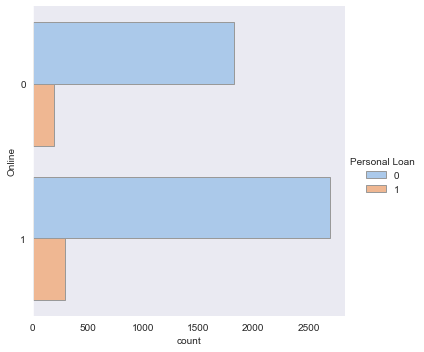

Cross tab
Online            0     1
Personal Loan            
0              1827  2693
1               189   291
Cross Tab in percent(%)
Online                 0          1
Personal Loan                      
0              40.420354  59.579646
1              39.375000  60.625000
Tests of proportions
For Online=0 the p-value of the proportion test with overall population is 0.7715288335802425
For Online=1 the p-value of the proportion test with overall population is 0.8239431230417914
There is no significant relationship between Online and Personal Loan


Exploring relationship between Family and Personal Loan


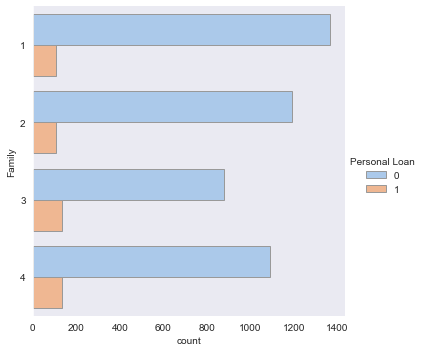

Cross tab
Family            1     2    3     4
Personal Loan                       
0              1365  1190  877  1088
1               107   106  133   134
Cross Tab in percent(%)
Family                 1          2          3          4
Personal Loan                                            
0              30.199115  26.327434  19.402655  24.070796
1              22.291667  22.083333  27.708333  27.916667
Tests of proportions
For Family=4 the p-value of the proportion test with overall population is 0.15130724342488586
For Family=3 the p-value of the proportion test with overall population is 0.0006314181450433531
For Family=1 the p-value of the proportion test with overall population is 0.006196749442114954
For Family=2 the p-value of the proportion test with overall population is 0.11663079896853434
There exists a significant relationship between Family and Personal Loan


Exploring relationship between Education and Personal Loan


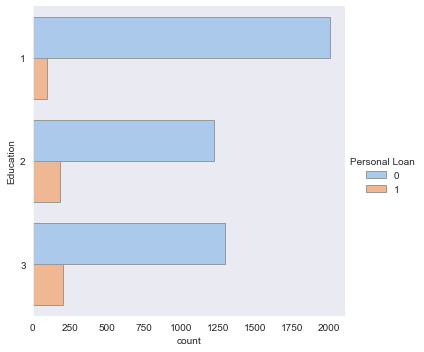

Cross tab
Education         1     2     3
Personal Loan                  
0              2003  1221  1296
1                93   182   205
Cross Tab in percent(%)
Education              1          2          3
Personal Loan                                 
0              44.314159  27.013274  28.672566
1              19.375000  37.916667  42.708333
Tests of proportions
For Education=1 the p-value of the proportion test with overall population is 3.274394549672913e-13
For Education=2 the p-value of the proportion test with overall population is 0.00024634144653261076
For Education=3 the p-value of the proportion test with overall population is 7.113082340893687e-06
There exists a significant relationship between Education and Personal Loan




[None, None, None, None, None, None]

In [20]:
[cat("Personal Loan",item,campaign_data) for item in cat2 if 'Personal Loan' not in item]

Education, Family Size and presence of a checking account seem to have a significant relationship with Personal Loans

# <font color=cyan>A lil bit of Feature Engineering</font>

First, let's put a cap on the Outliers

In [16]:
def remove_outlier(x):

    med=x.median()
    upq=np.percentile(x,75)
    lwq=np.percentile(x,25)
    iqr=upq-lwq
    print (med,upq,lwq,iqr)
    x=np.where(x>med+1.5*iqr,med+1.5*iqr,np.where(x<med-1.5*iqr,med-1.5*iqr,x))
    return x

In [17]:
campaign_data["Income_NoOut"]=remove_outlier(campaign_data["Income"])
campaign_data["CCAvg_NoOut"]=remove_outlier(campaign_data["CCAvg"])
campaign_data["Mortgage_NoOut"]=remove_outlier(campaign_data["Mortgage"])

64.0 98.0 39.0 59.0
1.5 2.5 0.7 1.8
0.0 101.0 0.0 101.0


Box Plot for Income(No treatment)


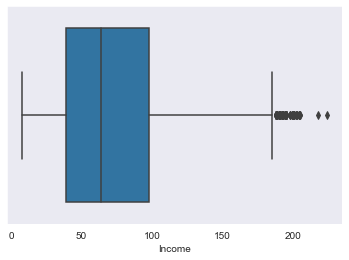

As per the 'Median +/- 1.5 times IQR
64.0 98.0 39.0 59.0
For Income(No treatment) there are 0 outliers on the lower side
For Income(No treatment) there are 423 outliers on the upper side
----------
Box Plot for Income(Treated for Outliers)


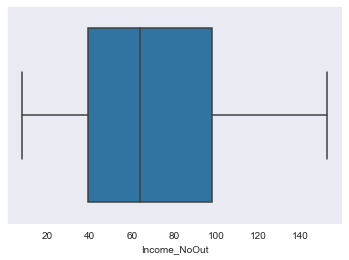

As per the 'Median +/- 1.5 times IQR
64.0 98.0 39.0 59.0
For Income(Treated for Outliers) there are 0 outliers on the lower side
For Income(Treated for Outliers) there are 0 outliers on the upper side
----------
Box Plot for Average Credit Card Spend(No treatment)


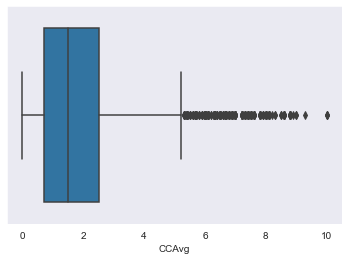

As per the 'Median +/- 1.5 times IQR
1.5 2.5 0.7 1.8
For Average Credit Card Spend(No treatment) there are 0 outliers on the lower side
For Average Credit Card Spend(No treatment) there are 517 outliers on the upper side
----------
Box Plot for Average Credit Card Spend(Treated for Outliers)


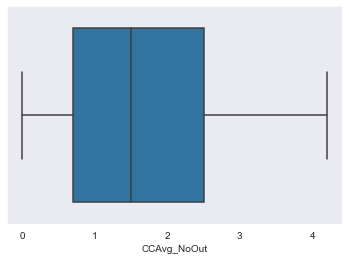

As per the 'Median +/- 1.5 times IQR
1.5 2.5 0.7 1.8
For Average Credit Card Spend(Treated for Outliers) there are 0 outliers on the lower side
For Average Credit Card Spend(Treated for Outliers) there are 0 outliers on the upper side
----------
Box Plot for Mortgage(No treatment)


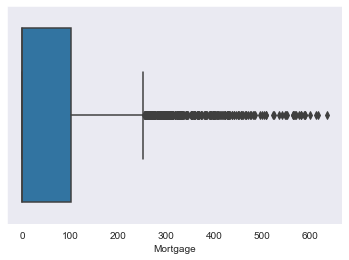

As per the 'Median +/- 1.5 times IQR
0.0 101.0 0.0 101.0
For Mortgage(No treatment) there are 0 outliers on the lower side
For Mortgage(No treatment) there are 776 outliers on the upper side
----------
Box Plot for Mortgage(Treated for Outliers)


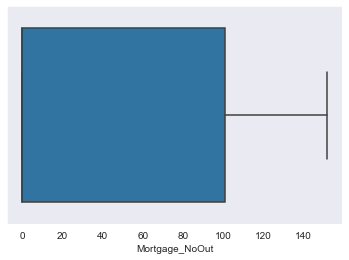

As per the 'Median +/- 1.5 times IQR
0.0 101.0 0.0 101.0
For Mortgage(Treated for Outliers) there are 0 outliers on the lower side
For Mortgage(Treated for Outliers) there are 0 outliers on the upper side
----------


In [20]:
outlier(campaign_data,campaign_data["Income"],"Income(No treatment)")
outlier(campaign_data,campaign_data["Income_NoOut"],"Income(Treated for Outliers)")
outlier(campaign_data,campaign_data["CCAvg"],"Average Credit Card Spend(No treatment)")
outlier(campaign_data,campaign_data["CCAvg_NoOut"],"Average Credit Card Spend(Treated for Outliers)")
outlier(campaign_data,campaign_data["Mortgage"],"Mortgage(No treatment)")
outlier(campaign_data,campaign_data["Mortgage_NoOut"],"Mortgage(Treated for Outliers)")

Let's check for skew of these now

Distribution of Income with Outlier Treatment


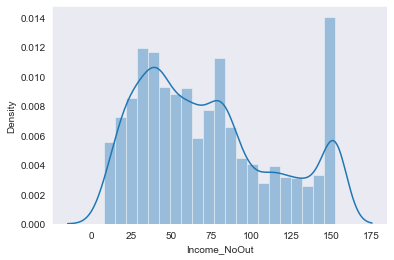

The skew of Income with Outlier Treatment is 0.5543575324383072 which indicates that it is skewed towards the tail
Distribution of Average Credit Card Spend with Outlier Treatment


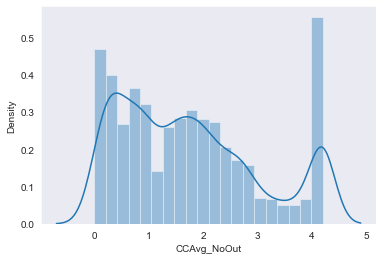

The skew of Average Credit Card Spend with Outlier Treatment is 0.588349818770679 which indicates that it is skewed towards the tail
Distribution of Mortgage with Outlier Treatment


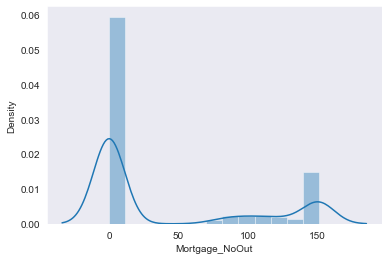

The skew of Mortgage with Outlier Treatment is 0.9810502937811937 which indicates that it is skewed towards the tail


In [24]:
skew_chart(campaign_data['Income_NoOut'],"Income with Outlier Treatment")
skew_chart(campaign_data['CCAvg_NoOut'],"Average Credit Card Spend with Outlier Treatment")
skew_chart(campaign_data['Mortgage_NoOut'],"Mortgage with Outlier Treatment")

Of course, a capping treatment will not address the skew, let's try a log transformation

In [21]:
campaign_data["Income_log"]=np.where(campaign_data['Income']==0,0,np.log(campaign_data['Income']))
campaign_data["CCAvg_log"]=np.where(campaign_data['CCAvg']==0,0,np.log(campaign_data['CCAvg']))
campaign_data["Mortgage_log"]=np.where(campaign_data['Mortgage']==0,0,np.log(campaign_data['Mortgage']))

Distribution of Log of Income


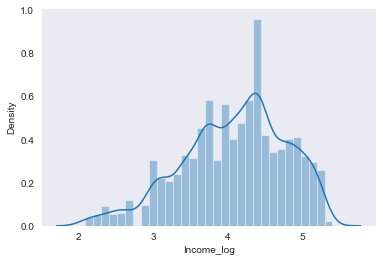

The skew of Log of Income is -0.46050403395988815 which indicates that it is fairly symmetric
Distribution of Log of Average Credit Card Spend


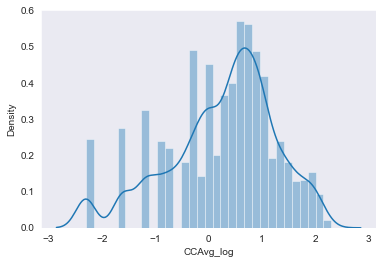

The skew of Log of Average Credit Card Spend is -0.5996023947004566 which indicates that it is skewed towards the head
Distribution of Log of Mortgage


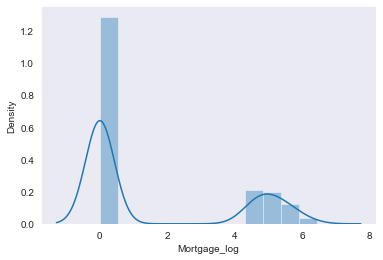

The skew of Log of Mortgage is 0.8772982703535349 which indicates that it is skewed towards the tail


In [22]:
skew_chart(campaign_data['Income_log'],"Log of Income")
skew_chart(campaign_data['CCAvg_log'],"Log of Average Credit Card Spend")
skew_chart(campaign_data['Mortgage_log'],"Log of Mortgage")

We can also create a binary indicator for Mortgage and check if it has any significance

In [23]:
campaign_data["Mortgage_ind"]=np.where(campaign_data["Mortgage"]>0,1,0)

Exploring relationship between Mortgage_ind and Personal Loan


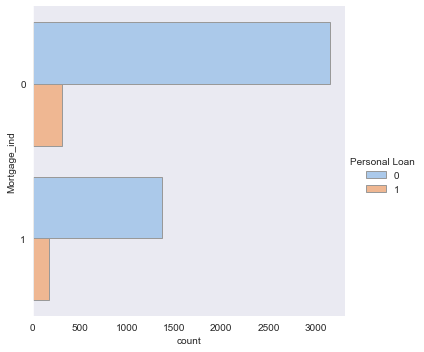

Cross tab
Mortgage_ind      0     1
Personal Loan            
0              3150  1370
1               312   168
Cross Tab in percent(%)
Mortgage_ind           0          1
Personal Loan                      
0              69.690265  30.309735
1              65.000000  35.000000
Tests of proportions
For Mortgage_ind=0 the p-value of the proportion test with overall population is 0.3613154866391789
For Mortgage_ind=1 the p-value of the proportion test with overall population is 0.1288210811200562
There is no significant relationship between Mortgage_ind and Personal Loan




In [28]:
cat("Personal Loan",'Mortgage_ind',campaign_data)

Addressing Zip Codes


If there is a likelihood that geography has an impact on the target variable, then categorical variables like Zipcodes should be included.

Method 1 - One-hot encoding but it is likely to increase the number of features

Method 2 - Use a higher order indicator like state or region

Method 3 - Use a proxy continuous field like average zip income or average zip age

In [24]:
zip_income=campaign_data.groupby('ZIP Code')["Income"].mean().rename('zip_income',inplace=True)
zip_age=campaign_data.groupby('ZIP Code')["Age"].median().rename('zip_age',inplace=True)
zip_ccspend=campaign_data.groupby('ZIP Code')["CCAvg"].median().rename('zip_ccavg',inplace=True)

In [25]:
zip_mortgage=pd.DataFrame(campaign_data.groupby("ZIP Code")["Mortgage_ind"].agg(["sum","count"]))
zip_mortgage_penetration=(zip_mortgage["sum"]/zip_mortgage["count"]*100).rename("zip_mortgage_penetration",inplace=True)


In [26]:
campaign_data=campaign_data.merge(zip_income,on='ZIP Code',how='left')
campaign_data=campaign_data.merge(zip_age,on='ZIP Code',how='left')
campaign_data=campaign_data.merge(zip_ccspend,on='ZIP Code',how='left')
campaign_data=campaign_data.merge(zip_mortgage_penetration,on='ZIP Code',how='left')

In [27]:
campaign_data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,...,CCAvg_NoOut,Mortgage_NoOut,Income_log,CCAvg_log,Mortgage_log,Mortgage_ind,zip_income,zip_age,zip_ccavg,zip_mortgage_penetration
0,1,25,1,49,91107,4,1.6,1,0,0,...,1.6,0.0,3.891820,0.470004,0.000000,0,86.560000,42.0,1.40,40.000000
1,2,45,19,34,90089,3,1.5,1,0,0,...,1.5,0.0,3.526361,0.405465,0.000000,0,83.152174,44.0,1.75,28.260870
2,3,39,15,11,94720,1,1.0,1,0,0,...,1.0,0.0,2.397895,0.000000,0.000000,0,73.680473,45.0,1.50,28.402367
3,4,35,9,100,94112,1,2.7,2,0,0,...,2.7,0.0,4.605170,0.993252,0.000000,0,55.363636,42.0,1.20,18.181818
4,5,35,8,45,91330,4,1.0,2,0,0,...,1.0,0.0,3.806662,0.000000,0.000000,0,65.673913,43.5,1.05,34.782609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,...,1.9,0.0,3.688879,0.641854,0.000000,0,76.684211,45.0,1.70,5.263158
4996,4997,30,4,15,92037,4,0.4,1,85,0,...,0.4,85.0,2.708050,-0.916291,4.442651,1,64.351852,41.5,1.20,40.740741
4997,4998,63,39,24,93023,2,0.3,3,0,0,...,0.3,0.0,3.178054,-1.203973,0.000000,0,76.058824,52.0,1.40,11.764706
4998,4999,65,40,49,90034,3,0.5,2,0,0,...,0.5,0.0,3.891820,-0.693147,0.000000,0,63.800000,44.0,1.45,35.000000


Relationship of zip_income with the response to Personal Loan offer




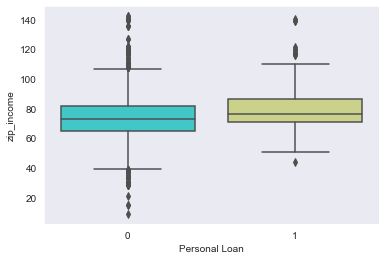

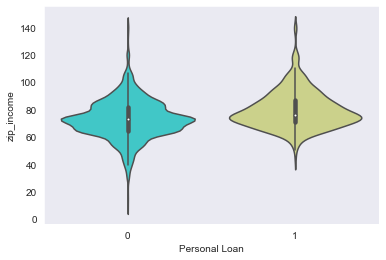

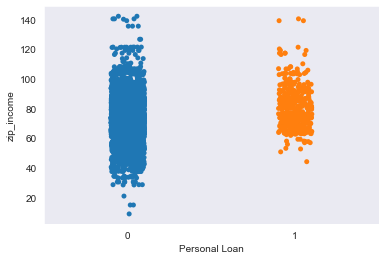

Relationship of zip_age with the response to Personal Loan offer




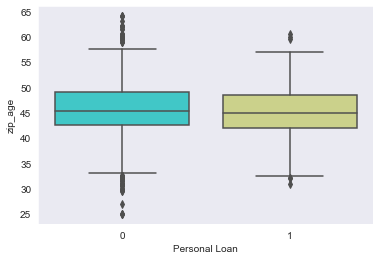

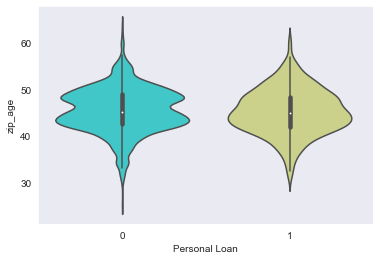

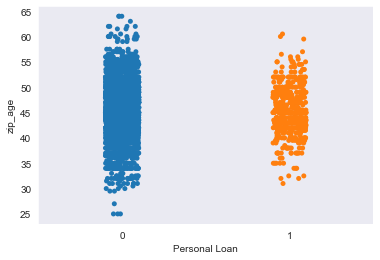

Relationship of zip_ccavg with the response to Personal Loan offer




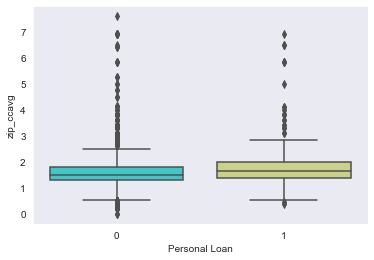

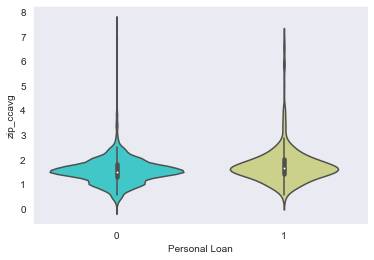

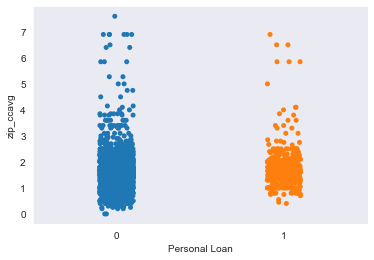

Relationship of zip_mortgage_penetration with the response to Personal Loan offer




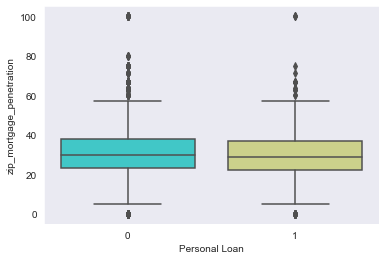

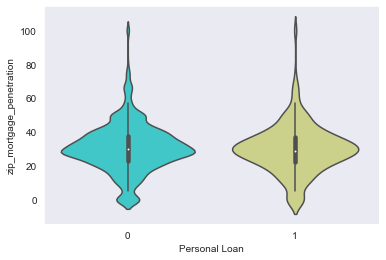

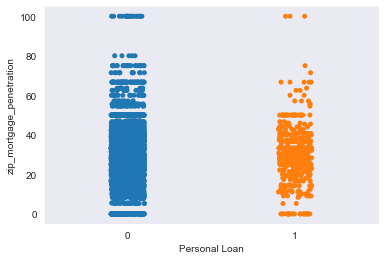

In [33]:
for i in ['zip_income','zip_age','zip_ccavg','zip_mortgage_penetration']:
    print("Relationship of " + i + " with the response to Personal Loan offer")
    print("\n")
    sns.boxplot(x='Personal Loan',y=i,data=campaign_data,palette='rainbow')
    plt.show()
    sns.violinplot(x="Personal Loan", y=i, data=campaign_data,palette='rainbow')
    plt.show()
    sns.stripplot(x="Personal Loan", y=i, data=campaign_data)
    plt.show()

Distribution of Average ZIP Income


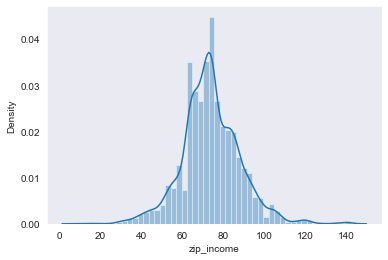

The skew of Average ZIP Income is 0.30287249080028955 which indicates that it is fairly symmetric
Distribution of Average ZIP Age


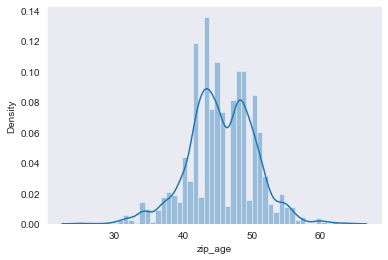

The skew of Average ZIP Age is -0.12742656710605907 which indicates that it is fairly symmetric
Distribution of Average ZIP Mortgage penetration


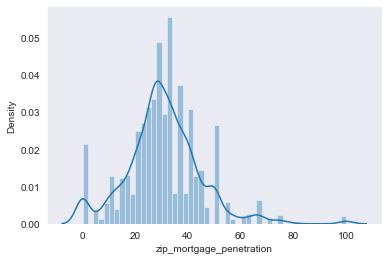

The skew of Average ZIP Mortgage penetration is 0.626666499086241 which indicates that it is skewed towards the tail
Distribution of Average ZIP Credit Card Spend


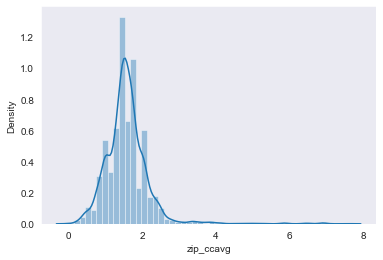

The skew of Average ZIP Credit Card Spend is 2.829784808638777 which indicates that it is skewed towards the tail


In [34]:
skew_chart(campaign_data['zip_income'],"Average ZIP Income")
skew_chart(campaign_data['zip_age'],"Average ZIP Age")
skew_chart(campaign_data['zip_mortgage_penetration'],"Average ZIP Mortgage penetration")
skew_chart(campaign_data['zip_ccavg'],"Average ZIP Credit Card Spend")

# <font color=cyan>Modeling Dataset Preparation</font>

One hot encoding of family and education columns

In [28]:
campaign_data=pd.concat([campaign_data,pd.get_dummies(campaign_data['Education']).rename(columns={1:'ed_undergrad',2:'ed_postgrad',3:'ed_advanced'})],axis=1)

In [29]:
campaign_data=pd.concat([campaign_data,pd.get_dummies(campaign_data['Family']).rename(columns={1:'family_1',2:'family_2',3:'family_3',4:'family_4'})],axis=1)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
#import xgboost as xgb
#from xgboost import XGBClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_score, LeaveOneOut, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support, roc_curve, roc_auc_score

In [111]:
X=campaign_data[[item for item in campaign_data.columns.to_list() if item not in ['Personal Loan','ID','Family','Education','ZIP Code']]]
y=campaign_data['Personal Loan']


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=145)

In [114]:
scaler = StandardScaler()

X_std = scaler.fit_transform(X)
X_rescaled=pd.DataFrame(X_std)

X_train_std = scaler.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_std)

X_test_std = scaler.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_std)

In [115]:
class_models = []
class_models.append(('LogisticRegression', LogisticRegression()))
class_models.append(('KNearestNeighbours', KNeighborsClassifier(n_neighbors= 3)))
class_models.append(('GaussianNB', GaussianNB()))
class_models.append(('DecisionTrees', DecisionTreeClassifier()))
class_models.append(('RandomForest', RandomForestClassifier()))
class_models.append(('AdaBoost', AdaBoostClassifier()))
class_models.append(('Bagging Classifier', BaggingClassifier()))
class_models.append(('GradientBoosting', GradientBoostingClassifier()))
#class_models.append(('XGB', XGBClassifier(verbosity=0)))
class_models.append(('SVC', SVC(kernel = 'rbf',probability=True)))

In [116]:
col = ['Algorithm', 'Model', 'Accuracy_Train', 'Accuracy_Test', 'Precision_Test', 'True_Positive Rate (Recall)','F1_Score_Test',
       'ROC_AUC_SCORE(Avg)']
model_results = pd.DataFrame(columns=col)
i=0

In [117]:
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    roc_auc_tot = 0
    k=0
    for per_class in unique_class:
        k+=1
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]
        
        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]
        
        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc
        roc_auc_tot = roc_auc_tot + roc_auc
    #Averaging for all the classes together
    roc_auc_avg = roc_auc_tot/k
    print('ROC-AUC Score (Avg) for Test set :', roc_auc_avg)
    print('\n')
    print('Count of Classes:', k)
    
    return roc_auc_dict, roc_auc_avg

In [118]:
def print_scores(name, model, y_train, y_pred_train, y_test, y_pred_test ):
    print("\n" + "\033[1m" + "\nModel: ",name)
    print("\033[0m")
    acc_score_train = accuracy_score(y_train, y_pred_train)
    acc_score_test = accuracy_score(y_test, y_pred_test)
    print("Training Set accuracy: ",acc_score_train)
    print("Test Set accuracy: ",acc_score_test)
    pre_score_train = precision_score(y_train, y_pred_train,average='weighted')
    pre_score_test = precision_score(y_test, y_pred_test, average='weighted')
    print("Test Set precision: ",pre_score_test)
    rec_score_train = recall_score(y_train, y_pred_train, average='weighted')
    rec_score_test = recall_score(y_test, y_pred_test, average='weighted')
    print("Test Set recall: ",rec_score_test)
    f_score_train = f1_score(y_train, y_pred_train, average='weighted')
    f_score_test = f1_score(y_test, y_pred_test, average='weighted')
    print("Test Set f1_score: ",f_score_test)
    
    lr_roc_auc_multiclass, roc_auc_avg = roc_auc_score_multiclass(y_test, y_pred_test)
    print("Test Set ROC_AUC_Score(Avg): ",roc_auc_avg)
    print('\n')
    print(lr_roc_auc_multiclass)
    
    model_results.loc[i] = [name, model,
                            round(acc_score_train*100, 2),
                            round(acc_score_test*100, 2),
                            round(pre_score_test*100, 2),
                            round(rec_score_test*100, 2),
                            round(f_score_test*100, 2),
                            round(roc_auc_avg*100, 2)]
    return

Classification Report using base LogisticRegression for Training dataset
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3161
           1       0.92      0.79      0.85       339

    accuracy                           0.97      3500
   macro avg       0.95      0.89      0.92      3500
weighted avg       0.97      0.97      0.97      3500

Classification Report using base LogisticRegression for Test dataset
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1359
           1       0.91      0.76      0.83       141

    accuracy                           0.97      1500
   macro avg       0.94      0.88      0.90      1500
weighted avg       0.97      0.97      0.97      1500



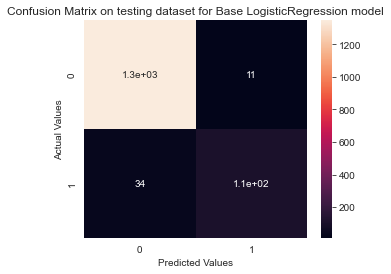



Model:  LogisticRegression(Base Model)

Training Set accuracy:  0.9734285714285714
Test Set accuracy:  0.97
Test Set precision:  0.9689478525350143
Test Set recall:  0.97
Test Set f1_score:  0.968793820140044
ROC-AUC Score (Avg) for Test set : 0.8753855306624081


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.8753855306624081


{0: 0.8753855306624081, 1: 0.8753855306624082}
Classification Report using base KNearestNeighbours for Training dataset
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3161
           1       0.97      0.78      0.87       339

    accuracy                           0.98      3500
   macro avg       0.98      0.89      0.93      3500
weighted avg       0.98      0.98      0.98      3500

Classification Report using base KNearestNeighbours for Test dataset
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1359
           1       0.89      0.60    

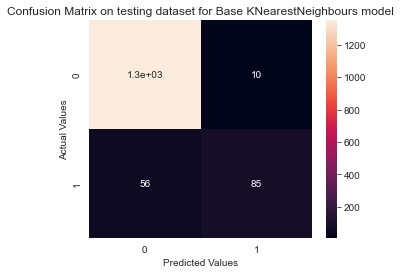



Model:  KNearestNeighbours(Base Model)

Training Set accuracy:  0.9771428571428571
Test Set accuracy:  0.956
Test Set precision:  0.953994231129425
Test Set recall:  0.956
Test Set f1_score:  0.9520780004415119
ROC-AUC Score (Avg) for Test set : 0.7977392638517058


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.7977392638517058


{0: 0.7977392638517058, 1: 0.7977392638517057}
Classification Report using base GaussianNB for Training dataset
              precision    recall  f1-score   support

           0       0.98      0.89      0.94      3161
           1       0.46      0.84      0.60       339

    accuracy                           0.89      3500
   macro avg       0.72      0.87      0.77      3500
weighted avg       0.93      0.89      0.90      3500

Classification Report using base GaussianNB for Test dataset
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1359
           1       0.40      0.82      0.54       1

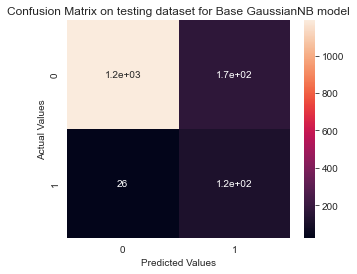



Model:  GaussianNB(Base Model)

Training Set accuracy:  0.8894285714285715
Test Set accuracy:  0.8686666666666667
Test Set precision:  0.9243935784149951
Test Set recall:  0.8686666666666667
Test Set f1_score:  0.8872650429473428
ROC-AUC Score (Avg) for Test set : 0.8448875111549481


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.8448875111549481


{0: 0.8448875111549481, 1: 0.8448875111549481}
Classification Report using base DecisionTrees for Training dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3161
           1       1.00      1.00      1.00       339

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500

Classification Report using base DecisionTrees for Test dataset
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1359
           1       0.89   

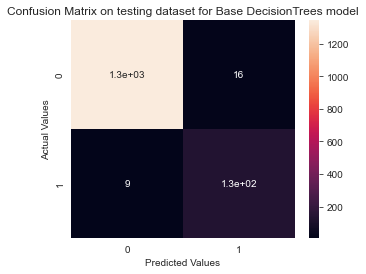



Model:  DecisionTrees(Base Model)

Training Set accuracy:  1.0
Test Set accuracy:  0.9833333333333333
Test Set precision:  0.9838067727490803
Test Set recall:  0.9833333333333333
Test Set f1_score:  0.9835136615020952
ROC-AUC Score (Avg) for Test set : 0.9621984249996086


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.9621984249996086


{0: 0.9621984249996086, 1: 0.9621984249996086}
Classification Report using base RandomForest for Training dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3161
           1       1.00      1.00      1.00       339

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500

Classification Report using base RandomForest for Test dataset
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1359
           1       0.98      0.89      0

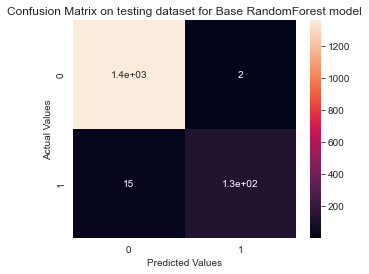



Model:  RandomForest(Base Model)

Training Set accuracy:  1.0
Test Set accuracy:  0.9886666666666667
Test Set precision:  0.9886260021865889
Test Set recall:  0.9886666666666667
Test Set f1_score:  0.9884197871335446
ROC-AUC Score (Avg) for Test set : 0.9460726754653765


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.9460726754653765


{0: 0.9460726754653765, 1: 0.9460726754653767}
Classification Report using base AdaBoost for Training dataset
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3161
           1       0.89      0.78      0.84       339

    accuracy                           0.97      3500
   macro avg       0.93      0.89      0.91      3500
weighted avg       0.97      0.97      0.97      3500

Classification Report using base AdaBoost for Test dataset
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1359
           1       0.81      0.74      0.77      

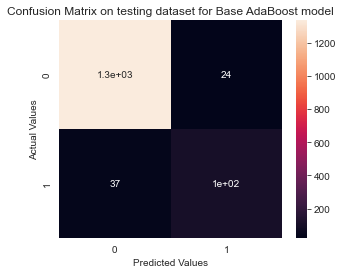



Model:  AdaBoost(Base Model)

Training Set accuracy:  0.97
Test Set accuracy:  0.9593333333333334
Test Set precision:  0.9579420553935859
Test Set recall:  0.9593333333333334
Test Set f1_score:  0.9584474714791891
ROC-AUC Score (Avg) for Test set : 0.8599643041660794


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.8599643041660794


{0: 0.8599643041660794, 1: 0.8599643041660795}
Classification Report using base Bagging Classifier for Training dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3161
           1       1.00      0.99      0.99       339

    accuracy                           1.00      3500
   macro avg       1.00      0.99      1.00      3500
weighted avg       1.00      1.00      1.00      3500

Classification Report using base Bagging Classifier for Test dataset
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1359
           1       0.94      0.8

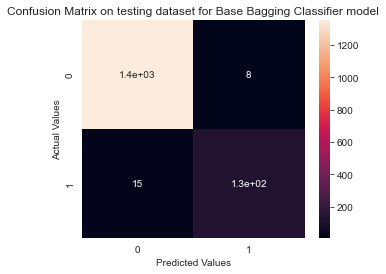



Model:  Bagging Classifier(Base Model)

Training Set accuracy:  0.9985714285714286
Test Set accuracy:  0.9846666666666667
Test Set precision:  0.9844393042110093
Test Set recall:  0.9846666666666667
Test Set f1_score:  0.9844912093411178
ROC-AUC Score (Avg) for Test set : 0.9438651699466127


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.9438651699466127


{0: 0.9438651699466128, 1: 0.9438651699466127}
Classification Report using base GradientBoosting for Training dataset
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3161
           1       0.99      0.95      0.97       339

    accuracy                           0.99      3500
   macro avg       0.99      0.97      0.98      3500
weighted avg       0.99      0.99      0.99      3500

Classification Report using base GradientBoosting for Test dataset
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1359
           1

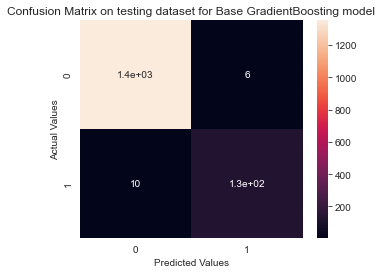



Model:  GradientBoosting(Base Model)

Training Set accuracy:  0.994
Test Set accuracy:  0.9893333333333333
Test Set precision:  0.9892361096979077
Test Set recall:  0.9893333333333333
Test Set f1_score:  0.9892644320987001
ROC-AUC Score (Avg) for Test set : 0.9623315015734348


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.9623315015734348


{0: 0.9623315015734348, 1: 0.9623315015734348}
Classification Report using base SVC for Training dataset
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3161
           1       0.99      0.88      0.93       339

    accuracy                           0.99      3500
   macro avg       0.99      0.94      0.96      3500
weighted avg       0.99      0.99      0.99      3500

Classification Report using base SVC for Test dataset
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1359
           1       0.97      0.81      0.88       141

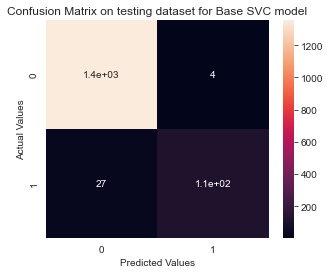



Model:  SVC(Base Model)

Training Set accuracy:  0.9871428571428571
Test Set accuracy:  0.9793333333333333
Test Set precision:  0.979113125168633
Test Set recall:  0.9793333333333333
Test Set f1_score:  0.9785024094298082
ROC-AUC Score (Avg) for Test set : 0.9027836488030936


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.9027836488030936


{0: 0.9027836488030936, 1: 0.9027836488030936}


In [119]:
for modelname, model in class_models:
    mdl=model.fit(X_train_scaled,y_train)
    pred_train=mdl.predict(X_train_scaled)
    pred_test=mdl.predict(X_test_scaled)
    print(f"Classification Report using base {modelname} for Training dataset")
    print(classification_report(y_train, pred_train))
    print(f"Classification Report using base {modelname} for Test dataset")
    print(classification_report(y_test, pred_test))
    
    cm = metrics.confusion_matrix(y_test, pred_test)
    cm_df = pd.DataFrame(cm)
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title(f'Confusion Matrix on testing dataset for Base {modelname} model')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
    i += 1
    print_scores(modelname + '(Base Model)', model, y_train, pred_train, y_test, pred_test)

In [120]:
model_results

,Algorithm,Model,Accuracy_Train,Accuracy_Test,Precision_Test,True_Positive Rate (Recall),F1_Score_Test,ROC_AUC_SCORE(Avg)
1,LogisticRegression(Base Model),LogisticRegression(),97.34,97.00,96.89,97.00,96.88,87.54
2,KNearestNeighbours(Base Model),KNeighborsClassifier(n_neighbors=3),97.71,95.60,95.40,95.60,95.21,79.77
3,GaussianNB(Base Model),GaussianNB(),88.94,86.87,92.44,86.87,88.73,84.49
4,DecisionTrees(Base Model),DecisionTreeClassifier(),100.00,98.33,98.38,98.33,98.35,96.22
5,RandomForest(Base Model),"(DecisionTreeClassifier(max_features='auto', r...",100.00,98.87,98.86,98.87,98.84,94.61
6,AdaBoost(Base Model),"(DecisionTreeClassifier(max_depth=1, random_st...",97.00,95.93,95.79,95.93,95.84,86.00
7,Bagging Classifier(Base Model),(DecisionTreeClassifier(random_state=143207285...,99.86,98.47,98.44,98.47,98.45,94.39
8,GradientBoosting(Base Model),([DecisionTreeRegressor(criterion='friedman_ms...,99.40,98.93,98.92,98.93,98.93,96.23
9,SVC(Base Model),SVC(probability=True),98.71,97.93,97.91,97.93,97.85,90.28


In [121]:
# Set grid/randomized search params
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_grids = []
param_grids.append(({'C': [0.001,0.01,0.1,1,10,100],
                     'penalty':['l1','l2']}))
param_grids.append(({'n_neighbors' : range(3, 16, 2), 
                    'weights' : ['distance'], 
                    'metric' : ['euclidean', 'manhattan', 'minkowski']}))
param_grids.append(({'var_smoothing': np.logspace(0,-9, num=100)}))
param_grids.append(({'max_depth':np.arange(10,50,10)}))
param_grids.append(({'max_depth': param_range, 
                   'min_samples_split': param_range[1:], 
                   'min_samples_leaf': param_range, 
                   'criterion':['gini','entropy']}))
param_grids.append(({'n_estimators':np.arange(50,100,10),
                   'learning_rate':[0.1,0.5]}))
param_grids.append(({'n_estimators':[10, 100, 1000]}))
param_grids.append(({'n_estimators':[5,50,100,1000],
                    'max_depth':[1,3,5,7,9], 
                    'learning_rate':[0.01,0.1,1]}))
'''
param_grids.append(({'learning_rate': [0.05, 0.10, 0.15], 
                    'max_depth': [ 3, 4, 5, 6, 8],
                    'min_child_weight' : [ 1, 3, 5],
                    'gamma' : [ 0.0, 0.1, 0.2 , 0.3], 
                    'colsample_bytree' : [ 0.3, 0.5 ]}))
'''
param_grids.append(({'kernel': ['poly', 'rbf', 'sigmoid'], 
                    'C': [10, 1.0, 0.1, 0.01],
                    'gamma': ['scale']}))

/Users/Kim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Kim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Best: 0.970857 using {'penalty': 'l2', 'C': 1}


The best Hyperparameters as per RandomizedSearchCV for LogisticRegression model are :
{'penalty': 'l2', 'C': 1}



Classification Report on training dataset for Best LogisticRegression model using Randomized Search
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3161
           1       0.92      0.79      0.85       339

    accuracy                           0.97      3500
   macro avg       0.95      0.89      0.92      3500
weighted avg       0.97      0.97      0.97      3500


Classification Report on Test dataset for Best LogisticRegression model using Randomized Search
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1359
           1       0.91      0.76      0.83       141

    accuracy                           0.97      1500
   macro avg       0.94      0.88      0.90      1500
weighted avg       0.97      0.97      0

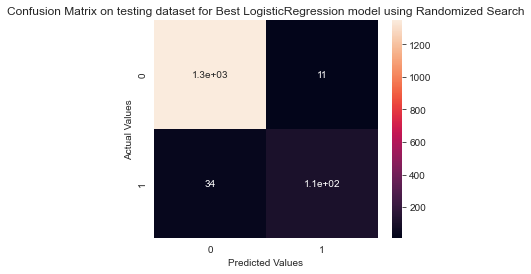



Model:  LogisticRegression(Randomized Search)

Training Set accuracy:  0.9734285714285714
Test Set accuracy:  0.97
Test Set precision:  0.9689478525350143
Test Set recall:  0.97
Test Set f1_score:  0.968793820140044
ROC-AUC Score (Avg) for Test set : 0.8753855306624081


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.8753855306624081


{0: 0.8753855306624081, 1: 0.8753855306624082}
Best: 0.963238 using {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}


The best Hyperparameters as per RandomizedSearchCV for KNearestNeighbours model are :
{'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}



Classification Report on training dataset for Best KNearestNeighbours model using Randomized Search
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3161
           1       1.00      1.00      1.00       339

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00     

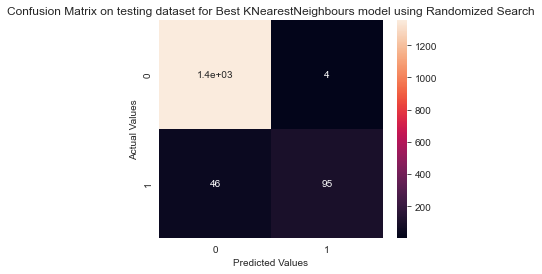



Model:  KNearestNeighbours(Randomized Search)

Training Set accuracy:  1.0
Test Set accuracy:  0.9666666666666667
Test Set precision:  0.9664546968615491
Test Set recall:  0.9666666666666667
Test Set f1_score:  0.9640036231884058
ROC-AUC Score (Avg) for Test set : 0.835407762278271


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.835407762278271


{0: 0.835407762278271, 1: 0.835407762278271}
Best: 0.890190 using {'var_smoothing': 0.1}


The best Hyperparameters as per RandomizedSearchCV for GaussianNB model are :
{'var_smoothing': 0.1}



Classification Report on training dataset for Best GaussianNB model using Randomized Search
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      3161
           1       0.46      0.82      0.59       339

    accuracy                           0.89      3500
   macro avg       0.72      0.86      0.76      3500
weighted avg       0.93      0.89      0.90      3500


Classification Report on Tes

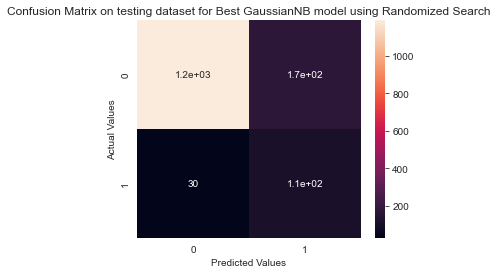



Model:  GaussianNB(Randomized Search)

Training Set accuracy:  0.8897142857142857
Test Set accuracy:  0.8673333333333333
Test Set precision:  0.9209855971896954
Test Set recall:  0.8673333333333333
Test Set f1_score:  0.8856592042985598
ROC-AUC Score (Avg) for Test set : 0.8314389491647488


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.8314389491647488


{0: 0.8314389491647488, 1: 0.8314389491647488}
Best: 0.978571 using {'max_depth': 30}


The best Hyperparameters as per RandomizedSearchCV for DecisionTrees model are :
{'max_depth': 30}



Classification Report on training dataset for Best DecisionTrees model using Randomized Search
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3161
           1       1.00      1.00      1.00       339

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500


Classification Report

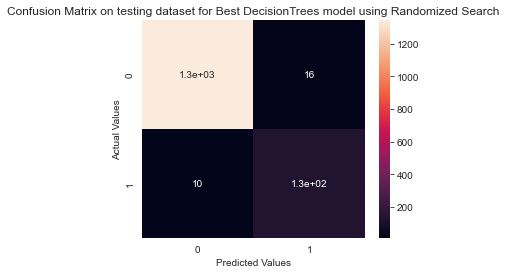



Model:  DecisionTrees(Randomized Search)

Training Set accuracy:  1.0
Test Set accuracy:  0.9826666666666667
Test Set precision:  0.9830724768843236
Test Set recall:  0.9826666666666667
Test Set f1_score:  0.9828280481809243
ROC-AUC Score (Avg) for Test set : 0.9586523257088285


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.9586523257088285


{0: 0.9586523257088285, 1: 0.9586523257088285}
Best: 0.981429 using {'min_samples_split': 2, 'min_samples_leaf': 6, 'max_depth': 8, 'criterion': 'entropy'}


The best Hyperparameters as per RandomizedSearchCV for RandomForest model are :
{'min_samples_split': 2, 'min_samples_leaf': 6, 'max_depth': 8, 'criterion': 'entropy'}



Classification Report on training dataset for Best RandomForest model using Randomized Search
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3161
           1       0.98      0.89      0.93       339

    accuracy                           0.99      3500
   ma

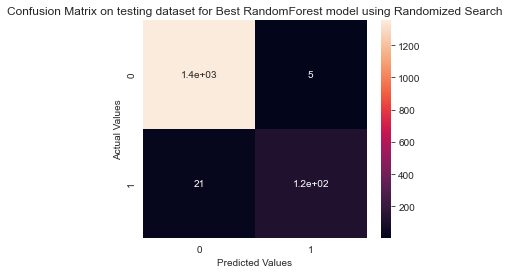



Model:  RandomForest(Randomized Search)

Training Set accuracy:  0.9877142857142858
Test Set accuracy:  0.9826666666666667
Test Set precision:  0.9824029090909089
Test Set recall:  0.9826666666666667
Test Set f1_score:  0.9821960827452684
ROC-AUC Score (Avg) for Test set : 0.9236923269613139


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.9236923269613139


{0: 0.9236923269613139, 1: 0.9236923269613139}
Best: 0.966571 using {'n_estimators': 50, 'learning_rate': 0.5}


The best Hyperparameters as per RandomizedSearchCV for AdaBoost model are :
{'n_estimators': 50, 'learning_rate': 0.5}



Classification Report on training dataset for Best AdaBoost model using Randomized Search
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3161
           1       0.93      0.76      0.84       339

    accuracy                           0.97      3500
   macro avg       0.95      0.87      0.91      3500
weighted avg       0.97      0.97  

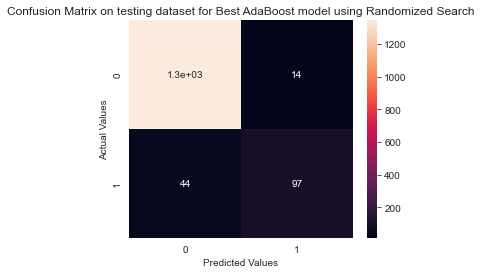



Model:  AdaBoost(Randomized Search)

Training Set accuracy:  0.9711428571428572
Test Set accuracy:  0.9613333333333334
Test Set precision:  0.9594443601268655
Test Set recall:  0.9613333333333334
Test Set f1_score:  0.9592428086227213
ROC-AUC Score (Avg) for Test set : 0.8388207849952249


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.8388207849952249


{0: 0.8388207849952249, 1: 0.8388207849952249}
Best: 0.986381 using {'n_estimators': 1000}


The best Hyperparameters as per RandomizedSearchCV for Bagging Classifier model are :
{'n_estimators': 1000}



Classification Report on training dataset for Best Bagging Classifier model using Randomized Search
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3161
           1       1.00      1.00      1.00       339

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500


Cla

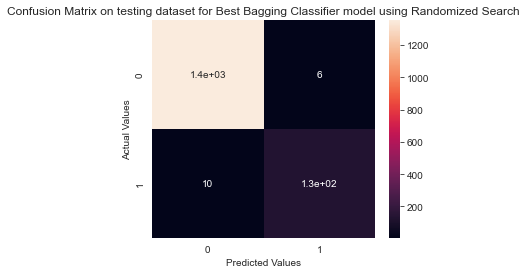



Model:  Bagging Classifier(Randomized Search)

Training Set accuracy:  1.0
Test Set accuracy:  0.9893333333333333
Test Set precision:  0.9892361096979077
Test Set recall:  0.9893333333333333
Test Set f1_score:  0.9892644320987001
ROC-AUC Score (Avg) for Test set : 0.9623315015734348


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.9623315015734348


{0: 0.9623315015734348, 1: 0.9623315015734348}
Best: 0.986762 using {'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.1}


The best Hyperparameters as per RandomizedSearchCV for GradientBoosting model are :
{'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.1}



Classification Report on training dataset for Best GradientBoosting model using Randomized Search
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3161
           1       1.00      1.00      1.00       339

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00   

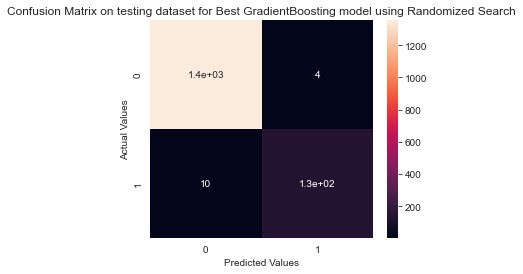



Model:  GradientBoosting(Randomized Search)

Training Set accuracy:  1.0
Test Set accuracy:  0.9906666666666667
Test Set precision:  0.9905774521774523
Test Set recall:  0.9906666666666667
Test Set f1_score:  0.9905754963927728
ROC-AUC Score (Avg) for Test set : 0.963067336746356


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.963067336746356


{0: 0.963067336746356, 1: 0.9630673367463561}
Best: 0.980000 using {'kernel': 'rbf', 'gamma': 'scale', 'C': 1.0}


The best Hyperparameters as per RandomizedSearchCV for SVC model are :
{'kernel': 'rbf', 'gamma': 'scale', 'C': 1.0}



Classification Report on training dataset for Best SVC model using Randomized Search
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3161
           1       0.99      0.88      0.93       339

    accuracy                           0.99      3500
   macro avg       0.99      0.94      0.96      3500
weighted avg       0.99      0.99      0.99      3500

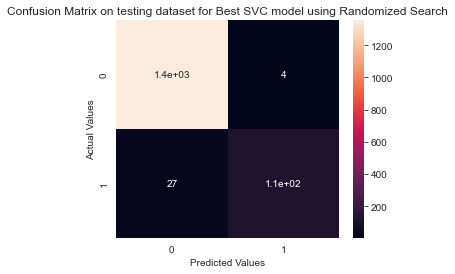



Model:  SVC(Randomized Search)

Training Set accuracy:  0.9871428571428571
Test Set accuracy:  0.9793333333333333
Test Set precision:  0.979113125168633
Test Set recall:  0.9793333333333333
Test Set f1_score:  0.9785024094298082
ROC-AUC Score (Avg) for Test set : 0.9027836488030936


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.9027836488030936


{0: 0.9027836488030936, 1: 0.9027836488030936}


In [122]:
#Hypertuning (Randomized Search) Different Models + Fit/Predict for GloVe Data 
j = 0
for modelname, model in class_models:
    # mdl=OneVsRestClassifier(model)
    mdl=model
    rs = RandomizedSearchCV(mdl,
                            param_grids[j],
                            n_jobs=-1, 
                            cv=cv,
                            scoring='accuracy',
                            refit=True) 
    #rand_search = RandomizedSearchCV(model, grid, n_iter=500, n_jobs=-1, cv=cv, scoring=scoring, error_score=0)
    rs_mdl=rs.fit(X_train_scaled,y_train)
    # summarize results
    print("Best: %f using %s" % (rs_mdl.best_score_, rs_mdl.best_params_))
    print('\n')
    print(f"The best Hyperparameters as per RandomizedSearchCV for {modelname} model are :")
    print(rs_mdl.best_params_)
    print('\n')
    
    predict_train_rs = rs_mdl.predict(X_train_scaled)
    
    predict_test_rs = rs_mdl.predict(X_test_scaled)
    
    print(f"\nClassification Report on training dataset for Best {modelname} model using Randomized Search")
    print(classification_report(y_train, predict_train_rs))
    
    print(f"\nClassification Report on Test dataset for Best {modelname} model using Randomized Search")
    print(classification_report(y_test, predict_test_rs))
    
    cm = metrics.confusion_matrix(y_test, predict_test_rs)
    cm_df = pd.DataFrame(cm)
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title(f'Confusion Matrix on testing dataset for Best {modelname} model using Randomized Search')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
 
    name=modelname+'(Randomized Search)'
    i += 1
    print_scores(name, rs_mdl, y_train, predict_train_rs, y_test, predict_test_rs)
    j += 1

In [124]:
model_results

,Algorithm,Model,Accuracy_Train,Accuracy_Test,Precision_Test,True_Positive Rate (Recall),F1_Score_Test,ROC_AUC_SCORE(Avg)
1,LogisticRegression(Base Model),LogisticRegression(),97.34,97.00,96.89,97.00,96.88,87.54
2,KNearestNeighbours(Base Model),KNeighborsClassifier(n_neighbors=3),97.71,95.60,95.40,95.60,95.21,79.77
3,GaussianNB(Base Model),GaussianNB(),88.94,86.87,92.44,86.87,88.73,84.49
4,DecisionTrees(Base Model),DecisionTreeClassifier(),100.00,98.33,98.38,98.33,98.35,96.22
5,RandomForest(Base Model),"(DecisionTreeClassifier(max_features='auto', r...",100.00,98.87,98.86,98.87,98.84,94.61
6,AdaBoost(Base Model),"(DecisionTreeClassifier(max_depth=1, random_st...",97.00,95.93,95.79,95.93,95.84,86.00
7,Bagging Classifier(Base Model),(DecisionTreeClassifier(random_state=143207285...,99.86,98.47,98.44,98.47,98.45,94.39
8,GradientBoosting(Base Model),([DecisionTreeRegressor(criterion='friedman_ms...,99.40,98.93,98.92,98.93,98.93,96.23
9,SVC(Base Model),SVC(probability=True),98.71,97.93,97.91,97.93,97.85,90.28
10,LogisticRegression(Randomized Search),RandomizedSearchCV(cv=RepeatedStratifiedKFold(...,97.34,97.00,96.89,97.00,96.88,87.54


### Before proceeding further, let's put in a word of caution. While the statistics above can be a means to judge the efficacy of the technique, we must be cognizant that the model/classifier has been developed only on a sample of the entire population. Our decision must look beyond just the numbers and also make an assessment of the variability in the real world process. Are we certain that the distribution on which the model has to be applied will remain fairly similar or is there a possibility that the population may change drastically? Will a KNN or an SVM perform as well in the application given there tendency to overfit? Or is a Logistic Regression model more suited given it's robustness?

#### Also, there are several more steps that can be carried out. For example, the target variable is unbalanced and the data balancing techniques can be applied. Or PCA can be employed for dimensionality reduction. We have also not proceeded to Neural Network/Deep Learning based techniques. However, let's pick one of the techniques here because the accuracy is high and the models also fit well to the test sets.

# <font color='cyan'>Proceeding with Gradient Boosting Classifier</font>

Classification Report using base SVC for Training dataset
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3161
           1       0.99      0.95      0.97       339

    accuracy                           0.99      3500
   macro avg       0.99      0.97      0.98      3500
weighted avg       0.99      0.99      0.99      3500

Classification Report using base SVC for Test dataset
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1359
           1       0.96      0.94      0.95       141

    accuracy                           0.99      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.99      0.99      0.99      1500



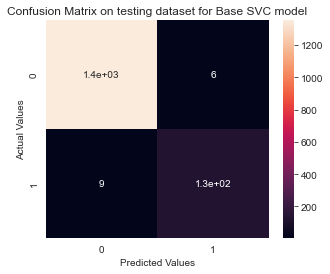

In [215]:
####(('GradientBoosting', GradientBoostingClassifier()))

model = GradientBoostingClassifier()
mdl=model.fit(X_train_scaled,y_train)
pred_train=mdl.predict(X_train_scaled)
pred_test=mdl.predict(X_test_scaled)
print(f"Classification Report using base {modelname} for Training dataset")
print(classification_report(y_train, pred_train))
print(f"Classification Report using base {modelname} for Test dataset")
print(classification_report(y_test, pred_test))
    
cm = metrics.confusion_matrix(y_test, pred_test)
cm_df = pd.DataFrame(cm)
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title(f'Confusion Matrix on testing dataset for Base {modelname} model')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
 #   i += 1
 #   print_scores(modelname + '(Base Model)', model, y_train, pred_train, y_test, pred_test)


In [216]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(mdl, X_rescaled, y, cv=10)
print(cv, cv.min(), cv.max(), cv.mean())

[0.99  0.988 0.984 0.99  0.982 0.988 0.986 0.992 0.986 0.984] 0.982 0.992 0.9870000000000001


In [218]:
feature_importance = pd.DataFrame(
{'feature':list(X_train.columns),
'feature_importance':[abs(i) for i in mdl.feature_importances_]}
)
print(feature_importance.to_markdown())

|    | feature                  |   feature_importance |
|---:|:-------------------------|---------------------:|
|  0 | Age                      |          0.00234626  |
|  1 | Experience               |          0.00208148  |
|  2 | Income                   |          0.053523    |
|  3 | CCAvg                    |          0.021723    |
|  4 | Mortgage                 |          0.000664182 |
|  5 | Securities Account       |          0.00023681  |
|  6 | CD Account               |          0.0162519   |
|  7 | Online                   |          0.0015626   |
|  8 | CreditCard               |          0.0011417   |
|  9 | Income_NoOut             |          0.16225     |
| 10 | CCAvg_NoOut              |          0.0187231   |
| 11 | Mortgage_NoOut           |          0           |
| 12 | Income_log               |          0.163726    |
| 13 | CCAvg_log                |          0.0317492   |
| 14 | Mortgage_log             |          0.000109735 |
| 15 | Mortgage_ind            

Let's drop a few factors that we had observed are not very significant

In [219]:
Xv2=X.drop(['Online','CreditCard','Securities Account','Experience','Age','zip_income','zip_age','zip_mortgage_penetration','zip_ccavg','Mortgage','Mortgage_NoOut','Mortgage_log','Mortgage_ind'], axis=1)


In [220]:
X2_train, X2_test, y2_train, y2_test = train_test_split(Xv2, y, test_size = .3, random_state=7)

In [221]:
scaler=StandardScaler()

X2_std=scaler.fit_transform(Xv2)
X2_scaled=pd.DataFrame(X2_std)

In [222]:
X2_train_std=scaler.fit_transform(X2_train)
X2_train_scaled=pd.DataFrame(X2_train_std)

In [223]:
X2_test_std=scaler.fit_transform(X2_test)
X2_test_scaled=pd.DataFrame(X2_test_std)

In [224]:
model=GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=model,
                            param_grid={'n_estimators':[5,50,100,1000],
                            'max_depth':[1,3,5,7,9], 
                            'learning_rate':[0.01,0.1,1]},
                            n_jobs=-1, 
                            cv=10,
                            scoring='accuracy',
                            refit=True) 



In [225]:
mdl=grid_search.fit(X2_train_scaled,y2_train)

In [226]:
mdl.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}

In [227]:
train_predict=mdl.predict(X2_train_scaled)
test_predict=mdl.predict(X2_test_scaled)

In [228]:
print(classification_report(y2_train, train_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3158
           1       0.99      0.94      0.96       342

    accuracy                           0.99      3500
   macro avg       0.99      0.97      0.98      3500
weighted avg       0.99      0.99      0.99      3500



In [229]:
print(classification_report(y2_test, test_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1362
           1       0.95      0.92      0.94       138

    accuracy                           0.99      1500
   macro avg       0.97      0.96      0.97      1500
weighted avg       0.99      0.99      0.99      1500



The confusion matrix is as follows


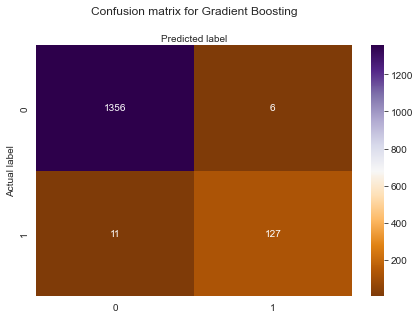

In [230]:
print("The confusion matrix is as follows")
class_names=["No","Yes"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y2_test, test_predict)), annot=True, cmap="PuOr" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Gradient Boosting', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [231]:
print("Final model hyperparameters - " + str(mdl.best_params_))
print('Accuracy of the final model is '+str(round(accuracy_score(y2_test,test_predict)*100,2))+"%")
print('Precision of the final model is '+str(round(precision_score(y2_test,test_predict)*100,2))+"%")
print('Recall of the final model is '+str(round(recall_score(y2_test,test_predict)*100,2))+"%")
print('F1 score of the final model is ' +str(round(f1_score(y2_test,test_predict)*100,2)))

Final model hyperparameters - {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
Accuracy of the final model is 98.87%
Precision of the final model is 95.49%
Recall of the final model is 92.03%
F1 score of the final model is 93.73


<font color='cyan'>This is a good enough model. We will use Gradient Boosting Classifier for our final model for the application</font>